In [6]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

In [7]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data'
df=pd.read_csv(url)
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [8]:
#Assigning columns names
df.columns=['Recency','frequency','Monetary','Time','Donated']
df

,Recency,frequency,Monetary,Time,Donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [9]:
df.isnull().sum()

Recency      0
frequency    0
Monetary     0
Time         0
Donated      0
dtype: int64

In [10]:
X=df.drop('Donated',axis=1)
y=df['Donated']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
clf=DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5, random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
y_pred = clf.predict(X_test)

In [14]:
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.78


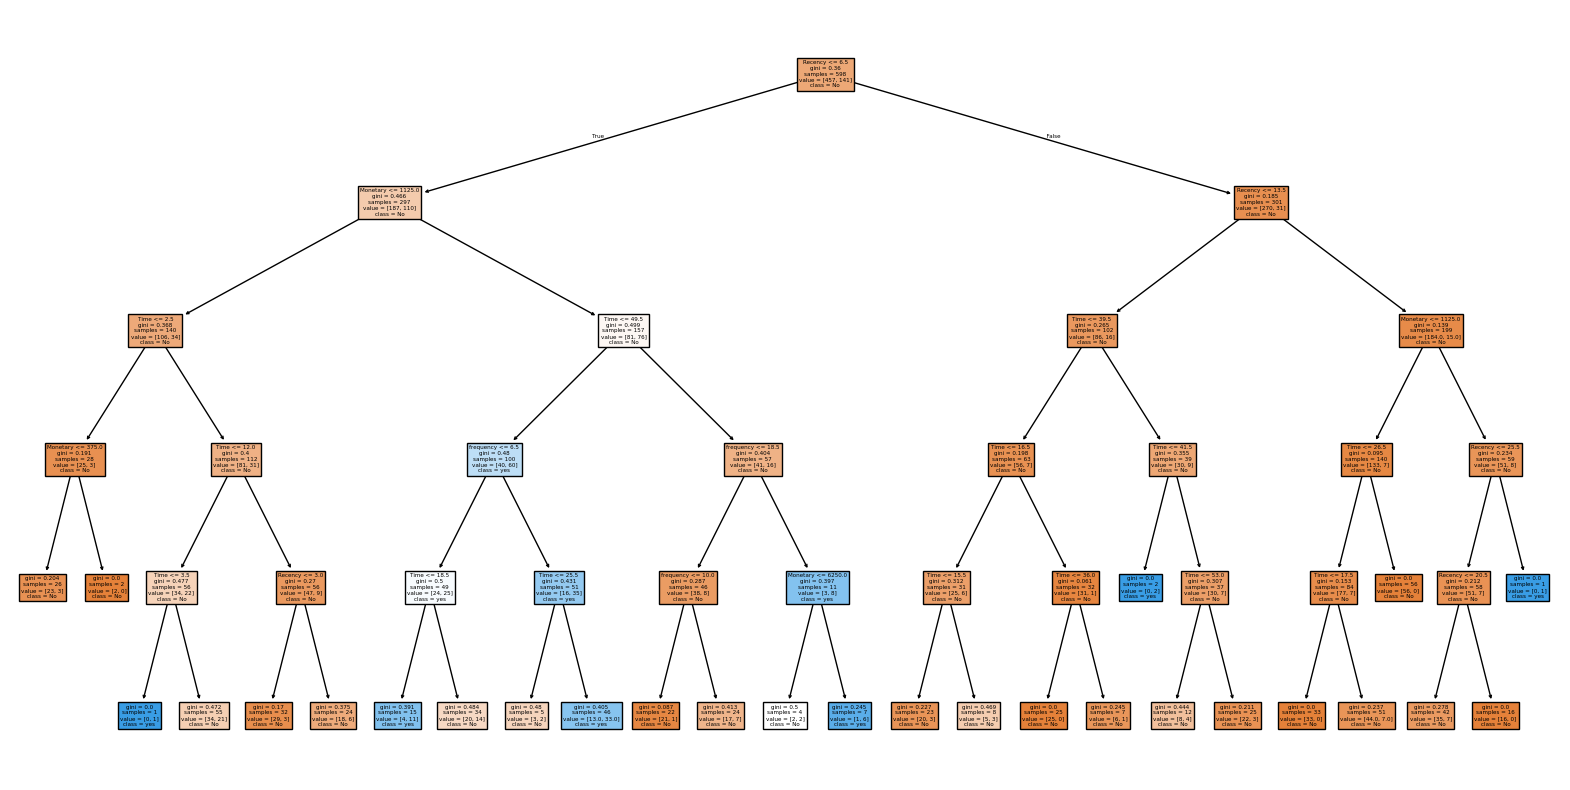

In [15]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf,filled=True,feature_names=X.columns, class_names=['No','yes'])
plt.show()

In [16]:
params=[
    {'criterion':'gini','max_depth':5,'min_samples_split':5},
    {'criterion':'gini','max_depth':10,'min_samples_split':5},
    {'criterion':'entropy','max_depth':5,'min_samples_split':5},
    {'criterion':'entropy','max_depth':8,'min_samples_split':6}
]

In [17]:
for param in params:
    clf=DecisionTreeClassifier(criterion=param['criterion'],max_depth=param['max_depth'],min_samples_split=param['min_samples_split'],random_state=42)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    print(f'params:{param}')
    print(f'Accuracy:{accuracy:2f}')
    # print(confusion_matrix(y_test, y_pred))

params:{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Accuracy:0.780000
params:{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Accuracy:0.660000
params:{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}
Accuracy:0.786667
params:{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 6}
Accuracy:0.713333


In [18]:
from joblib import dump
#saving the model
dump(clf,'blood_donation_model.joblib')

['blood_donation_model.joblib']